In [1]:
%autosave 0

Autosave disabled


In [2]:
#!wget https://github.com/DataTalksClub/machine-learning-zoomcamp/releases/download/chapter7-model/xception_v4_large_08_0.894.h5 -O clothing-model.h5

In [3]:
!python -V

Python 3.10.12


In [ ]:
# Need to install the following versions of the libraries to run the code
# need to downgrade numpy to 1.21.6
# pip install tflite-runtime keras-image-helper numpy==1.21.6
# !pip install tensorflow==2.10.0

In [5]:
import numpy as np

import tensorflow as tf
from tensorflow import keras

tf.__version__

2024-12-05 16:59:24.592259: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-05 16:59:24.733120: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-12-05 16:59:24.733141: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-12-05 16:59:24.766753: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 16:59:25.360643: W tensorflow/stream_executor/platform/de

'2.10.0'

In [6]:
#!wget http://bit.ly/mlbookcamp-pants -O pants.jpg

In [7]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input

In [8]:
model = keras.models.load_model('clothing-model.h5')

2024-12-05 16:59:30.381730: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-05 16:59:30.381850: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-12-05 16:59:30.381919: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2024-12-05 16:59:30.382008: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2024-12-05 16:59:30.382068: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

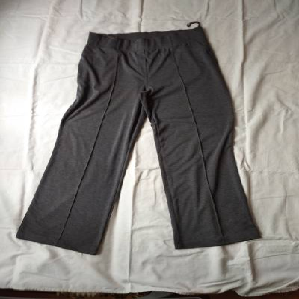

In [9]:
img = load_img('pants.jpg', target_size=(299, 299))
img

In [10]:
x = np.array(img)
X = np.array([x])

X = preprocess_input(X)

X.shape

(1, 299, 299, 3)

In [11]:
preds = model.predict(X)

1/1 [==============================] - 1s 662ms/step


In [12]:
preds

array([[-1.8798645, -4.75631  , -2.3595324, -1.089265 ,  9.903785 ,
        -2.8261786, -3.6483104,  3.2411547, -2.6120958, -4.8520355]],
      dtype=float32)

In [13]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [14]:
dict(zip(classes, preds[0]))

{'dress': -1.8798645,
 'hat': -4.75631,
 'longsleeve': -2.3595324,
 'outwear': -1.089265,
 'pants': 9.903785,
 'shirt': -2.8261786,
 'shoes': -3.6483104,
 'shorts': 3.2411547,
 'skirt': -2.6120958,
 't-shirt': -4.8520355}

## Convert Keras to TF-Lite

In [15]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

with open('clothing-model.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpx_jx4fwh/assets


INFO:tensorflow:Assets written to: /tmp/tmpx_jx4fwh/assets
2024-12-05 16:59:55.969115: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2024-12-05 16:59:55.969173: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2024-12-05 16:59:55.969766: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpx_jx4fwh
2024-12-05 16:59:55.991074: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2024-12-05 16:59:55.991118: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmpx_jx4fwh
2024-12-05 16:59:56.055925: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2024-12-05 16:59:56.087935: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2024-12-05 16:59:56.660980: I tensorflow/cc/saved_model/loader.cc:213] Running initializatio

In [16]:
!ls -lh

total 163M
-rw-r--r-- 1 ruifspinto ruifspinto  315 Nov 30 15:18 Dockerfile
-rw-r--r-- 1 ruifspinto ruifspinto  83M Dec  7  2021 clothing-model.h5
-rw-r--r-- 1 ruifspinto ruifspinto  81M Dec  5 16:59 clothing-model.tflite
-rw-r--r-- 1 ruifspinto ruifspinto  295 Dec  5 13:31 convert-model.py
-rw-r--r-- 1 ruifspinto ruifspinto 1.1K Nov 30 15:18 lambda_function.py
-rw-r--r-- 1 ruifspinto ruifspinto  23K Dec  5 14:20 pants.jpg
-rw-r--r-- 1 ruifspinto ruifspinto 1.5K Nov 30 15:18 plan.md
-rw-r--r-- 1 ruifspinto ruifspinto  57K Dec  5 16:59 tensorflow-model.ipynb
-rw-r--r-- 1 ruifspinto ruifspinto  208 Nov 30 15:18 test.py


In [ ]:
import tensorflow.lite as tflite # don't use this use the following, use import tflite_runtime.interpreter as tflite

# it won't be dependent on the tensorflow version, but for teh purpose of this course we are using the above import

In [18]:
# Load TFLite model and allocate tensors.
interpreter = tflite.Interpreter(model_path='clothing-model.tflite')

# Allocate memory for the model's input Tensor.
interpreter.allocate_tensors()

# Get input and output tensors.
input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
print(input_index, output_index)

0 229


In [20]:
# Provide the input data in int8 format.
interpreter.set_tensor(input_index, X)
interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
preds = interpreter.get_tensor(output_index)

In [21]:
preds

array([[-1.8798653, -4.7563086, -2.3595326, -1.0892627,  9.903783 ,
        -2.8261797, -3.648309 ,  3.2411575, -2.6120954, -4.8520327]],
      dtype=float32)

In [22]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

dict(zip(classes, preds[0]))

{'dress': -1.8798653,
 'hat': -4.7563086,
 'longsleeve': -2.3595326,
 'outwear': -1.0892627,
 'pants': 9.903783,
 'shirt': -2.8261797,
 'shoes': -3.648309,
 'shorts': 3.2411575,
 'skirt': -2.6120954,
 't-shirt': -4.8520327}

## Removing TF dependency

In [23]:
# in tf-lite we do not have the same stuff has in keras
# from tensorflow.keras.preprocessing.image import load_img
# from tensorflow.keras.applications.xception import preprocess_input

In [24]:
from PIL import Image

In [25]:
with Image.open('pants.jpg') as img:
    img = img.resize((299, 299), Image.NEAREST)

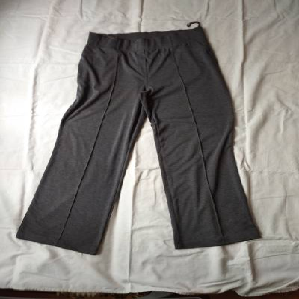

In [26]:
img

In [27]:
def preprocess_input(x):
    x /= 127.5
    x -= 1.
    return x

In [28]:
x = np.array(img, dtype='float32')
X = np.array([x])

X = preprocess_input(X)

In [29]:
X.shape

(1, 299, 299, 3)

In [30]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [31]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

dict(zip(classes, preds[0]))

{'dress': -1.8798653,
 'hat': -4.7563086,
 'longsleeve': -2.3595326,
 'outwear': -1.0892627,
 'pants': 9.903783,
 'shirt': -2.8261797,
 'shoes': -3.648309,
 'shorts': 3.2411575,
 'skirt': -2.6120954,
 't-shirt': -4.8520327}

## Simpler way of doing it

In [ ]:
#!pip install keras-image-helper

In [ ]:
#!pip install --extra-index-url https://google-coral.github.io/py-repo/ tflite_runtime

Looking in indexes: https://pypi.org/simple, https://google-coral.github.io/py-repo/
  Using cached numpy-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.1
    Uninstalling numpy-1.23.1:
      Successfully uninstalled numpy-1.23.1


In [34]:
# import tensorflow.lite as tflite

In [36]:
#import tflite_runtime.interpreter as tflite # this is the one we want to deploy for cloud functions

In [37]:
from keras_image_helper import create_preprocessor

In [38]:
interpreter = tflite.Interpreter(model_path='clothing-model.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

In [39]:
print(input_index, output_index)

0 229


In [40]:
preprocessor = create_preprocessor('xception', target_size=(299, 299))

In [41]:
preprocessor

In [42]:
url = 'http://bit.ly/mlbookcamp-pants'
X = preprocessor.from_url(url)

In [43]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [44]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

dict(zip(classes, preds[0]))

{'dress': -1.8798653,
 'hat': -4.7563086,
 'longsleeve': -2.3595326,
 'outwear': -1.0892627,
 'pants': 9.903783,
 'shirt': -2.8261797,
 'shoes': -3.648309,
 'shorts': 3.2411575,
 'skirt': -2.6120954,
 't-shirt': -4.8520327}